In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', 50)

# Rutas
BASE_DIR = Path().resolve().parent
DATA_PATH = BASE_DIR / 'data' / 'gold' / 'model' / 'classification_dominant_dataset.parquet'

In [4]:
# Cargar datos
df = pd.read_parquet(DATA_PATH)
print(f"Shape: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")
df.head()

Shape: (16704, 7)

Columnas: ['codigo_municipio', 'anio', 'mes', 'delito_dominante', 'count_delito', 'arma_dominante', 'count_arma']


,codigo_municipio,anio,mes,delito_dominante,count_delito,arma_dominante,count_arma
0,68001,2010,1,LESIONES,160,CONTUNDENTES,84
1,68001,2010,2,LESIONES,140,NO REPORTADO,82
2,68001,2010,3,LESIONES,164,NO REPORTADO,99
3,68001,2010,4,LESIONES,181,NO REPORTADO,111
4,68001,2010,5,LESIONES,164,NO REPORTADO,113


In [5]:
# Info general
print("=" * 60)
print("INFO GENERAL")
print("=" * 60)
df.info()
print("\n")
df.describe()

INFO GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16704 entries, 0 to 16703
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   codigo_municipio  16704 non-null  Int64   
 1   anio              16704 non-null  Int64   
 2   mes               16704 non-null  Int64   
 3   delito_dominante  16704 non-null  category
 4   count_delito      16704 non-null  int64   
 5   arma_dominante    16704 non-null  category
 6   count_arma        16704 non-null  int64   
dtypes: Int64(3), category(2), int64(2)
memory usage: 736.0 KB




,codigo_municipio,anio,mes,count_delito,count_arma
count,16704.0,16704.0,16704.0,16704.000000,16704.000000
mean,68408.735632,2017.5,6.5,9.320342,9.230364
std,242.890879,4.60991,3.452156,37.645483,37.865740
min,68001.0,2010.0,1.0,0.000000,0.000000
25%,68209.0,2013.75,3.75,1.000000,1.000000
50%,68370.0,2017.5,6.5,2.000000,2.000000
75%,68615.0,2021.25,9.25,4.000000,4.000000
max,68895.0,2025.0,12.0,1057.000000,1283.000000


## 1. Balance de Clases - Delito Dominante

In [6]:
# Balance de clases: delito_dominante
print("=" * 60)
print("BALANCE DE CLASES: delito_dominante")
print("=" * 60)

delito_counts = df['delito_dominante'].value_counts()
delito_pct = df['delito_dominante'].value_counts(normalize=True) * 100

balance_delito = pd.DataFrame({
    'count': delito_counts,
    'porcentaje': delito_pct.round(2)
})
print(balance_delito)

# Ratio de desbalance
ratio = delito_counts.max() / delito_counts.min()
print(f"\nRatio max/min: {ratio:.2f}")
print(f"Clase mayoritaria: {delito_counts.idxmax()} ({delito_counts.max():,})")
print(f"Clase minoritaria: {delito_counts.idxmin()} ({delito_counts.min():,})")

BALANCE DE CLASES: delito_dominante
                         count  porcentaje
delito_dominante                          
LESIONES                  5916       35.42
ABIGEATO                  4200       25.14
HURTOS                    1976       11.83
AMENAZAS                  1922       11.51
VIOLENCIA INTRAFAMILIAR   1380        8.26
DELITOS SEXUALES           910        5.45
HOMICIDIOS                 331        1.98
EXTORSION                   69        0.41

Ratio max/min: 85.74
Clase mayoritaria: LESIONES (5,916)
Clase minoritaria: EXTORSION (69)


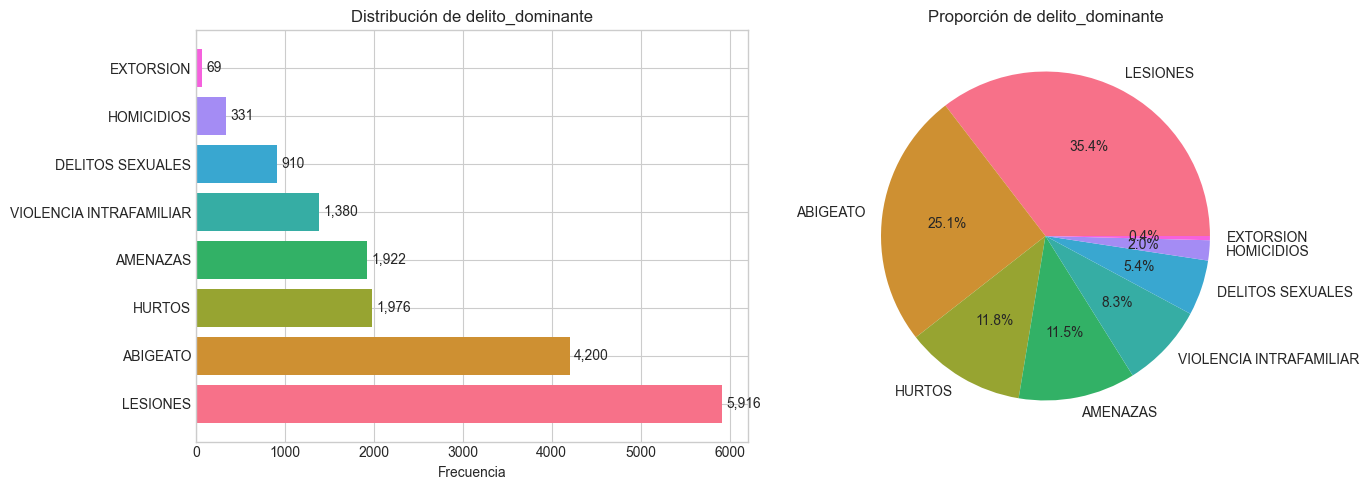

In [7]:
# Visualización balance delito_dominante
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barplot
colors = sns.color_palette('husl', len(delito_counts))
ax1 = axes[0]
bars = ax1.barh(delito_counts.index, delito_counts.values, color=colors)
ax1.set_xlabel('Frecuencia')
ax1.set_title('Distribución de delito_dominante')
for bar, val in zip(bars, delito_counts.values):
    ax1.text(val + 50, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center')

# Pie chart
ax2 = axes[1]
ax2.pie(delito_counts.values, labels=delito_counts.index, autopct='%1.1f%%', colors=colors)
ax2.set_title('Proporción de delito_dominante')

plt.tight_layout()
plt.show()

## 2. Balance de Clases - Arma Dominante

In [8]:
# Balance de clases: arma_dominante
print("=" * 60)
print("BALANCE DE CLASES: arma_dominante")
print("=" * 60)

arma_counts = df['arma_dominante'].value_counts()
arma_pct = df['arma_dominante'].value_counts(normalize=True) * 100

balance_arma = pd.DataFrame({
    'count': arma_counts,
    'porcentaje': arma_pct.round(2)
})
print(balance_arma.head(15))

# Ratio de desbalance
ratio = arma_counts.max() / arma_counts.min()
print(f"\nTotal categorías: {len(arma_counts)}")
print(f"Ratio max/min: {ratio:.2f}")
print(f"Clase mayoritaria: {arma_counts.idxmax()} ({arma_counts.max():,})")
print(f"Clase minoritaria: {arma_counts.idxmin()} ({arma_counts.min():,})")

BALANCE DE CLASES: arma_dominante
                             count  porcentaje
arma_dominante                                
CONTUNDENTES                  5740       34.36
ACIDO                         4094       24.51
SIN EMPLEO DE ARMAS           3521       21.08
ARMA BLANCA / CORTOPUNZANTE   1308        7.83
NO REPORTADO                  1200        7.18
ARMA DE FUEGO                  502        3.01
VEHICULO                       111        0.66
MOTO                            73        0.44
PALANCAS                        39        0.23
LLAMADA TELEFONICA              32        0.19
ESCOPOLAMINA                    14        0.08
CORTANTES                       11        0.07
DIRECTA                         11        0.07
LLAVE MAESTRA                    9        0.05
REDES SOCIALES                   5        0.03

Total categorías: 48
Ratio max/min: inf
Clase mayoritaria: CONTUNDENTES (5,740)
Clase minoritaria: ALUCINOGENOS (0)


C:\Users\57318\AppData\Local\Temp\ipykernel_14880\1040147712.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = arma_counts.max() / arma_counts.min()


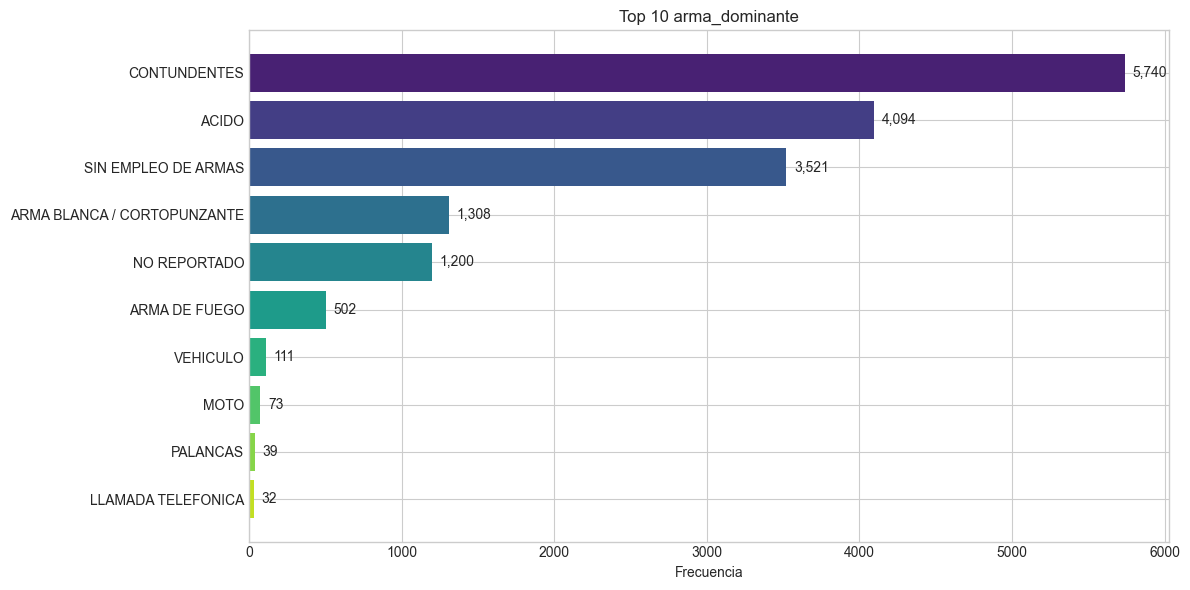

In [9]:
# Visualización top 10 arma_dominante
fig, ax = plt.subplots(figsize=(12, 6))

top_armas = arma_counts.head(10)
colors = sns.color_palette('viridis', len(top_armas))
bars = ax.barh(top_armas.index, top_armas.values, color=colors)
ax.set_xlabel('Frecuencia')
ax.set_title('Top 10 arma_dominante')
ax.invert_yaxis()

for bar, val in zip(bars, top_armas.values):
    ax.text(val + 50, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center')

plt.tight_layout()
plt.show()

## 3. Análisis Temporal

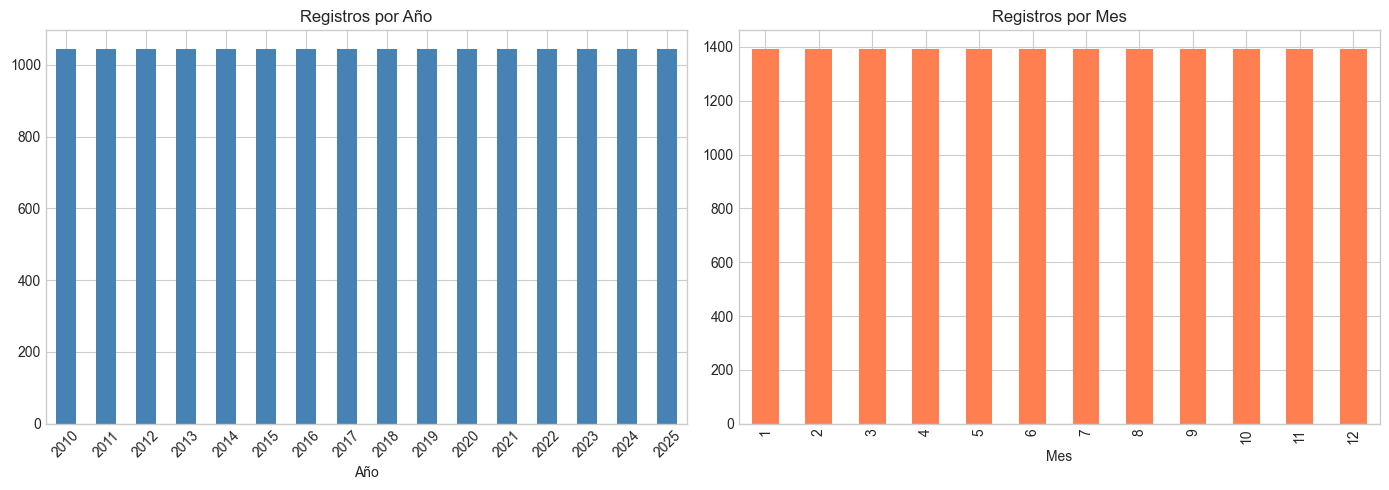

In [10]:
# Distribución temporal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Por año
df.groupby('anio').size().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Registros por Año')
axes[0].set_xlabel('Año')
axes[0].tick_params(axis='x', rotation=45)

# Por mes
df.groupby('mes').size().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Registros por Mes')
axes[1].set_xlabel('Mes')

plt.tight_layout()
plt.show()

## 4. Conclusiones y Recomendaciones

In [11]:
print("=" * 60)
print("CONCLUSIONES")
print("=" * 60)

# Análisis de balance para delito_dominante
ratio_delito = delito_counts.max() / delito_counts.min()
if ratio_delito > 10:
    status_delito = "⚠️ MUY DESBALANCEADO - Requiere augmentación/SMOTE"
elif ratio_delito > 3:
    status_delito = "⚡ MODERADAMENTE DESBALANCEADO - Considerar class_weight"
else:
    status_delito = "✅ BALANCEADO - No requiere augmentación"

print(f"\ndelito_dominante:")
print(f"  Ratio: {ratio_delito:.2f}")
print(f"  Status: {status_delito}")

# Análisis de balance para arma_dominante
ratio_arma = arma_counts.max() / arma_counts.min()
n_clases_raras = (arma_counts < 100).sum()

if ratio_arma > 100 or n_clases_raras > len(arma_counts) * 0.5:
    status_arma = "⚠️ MUY DESBALANCEADO - Considerar agrupar clases minoritarias"
elif ratio_arma > 10:
    status_arma = "⚡ DESBALANCEADO - Usar class_weight o SMOTE"
else:
    status_arma = "✅ ACEPTABLE"

print(f"\narma_dominante:")
print(f"  Ratio: {ratio_arma:.2f}")
print(f"  Clases con <100 muestras: {n_clases_raras}")
print(f"  Status: {status_arma}")


CONCLUSIONES

delito_dominante:
  Ratio: 85.74
  Status: ⚠️ MUY DESBALANCEADO - Requiere augmentación/SMOTE

arma_dominante:
  Ratio: inf
  Clases con <100 muestras: 41
  Status: ⚠️ MUY DESBALANCEADO - Considerar agrupar clases minoritarias


C:\Users\57318\AppData\Local\Temp\ipykernel_14880\45066373.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  ratio_arma = arma_counts.max() / arma_counts.min()


## 5. Preparación de Datos para Modelo

Aplicamos las recomendaciones del EDA:
1. **arma_dominante**: Agrupar categorías minoritarias (<100 muestras) en "OTROS"
2. **delito_dominante**: Opcional - agrupar EXTORSION y HOMICIDIOS si se desea
3. **Lag features**: Agregar características temporales
4. **Features adicionales**: Encodings cíclicos para mes

In [12]:
# 5.1 Agrupar categorías minoritarias de arma_dominante
MIN_SAMPLES = 100  # Umbral mínimo de muestras

# Identificar categorías a mantener vs agrupar
arma_counts = df['arma_dominante'].value_counts()
categorias_validas = arma_counts[arma_counts >= MIN_SAMPLES].index.tolist()
categorias_agrupadas = arma_counts[arma_counts < MIN_SAMPLES].index.tolist()

print(f"Categorías con >= {MIN_SAMPLES} muestras: {len(categorias_validas)}")
print(f"Categorías a agrupar en 'OTROS': {len(categorias_agrupadas)}")
print(f"\nCategorías válidas: {categorias_validas}")

# Crear nueva columna con agrupación
df['arma_modelo'] = df['arma_dominante'].apply(
    lambda x: x if x in categorias_validas else 'OTROS'
)

# Verificar nueva distribución
print("\n" + "=" * 60)
print("NUEVA DISTRIBUCIÓN: arma_modelo")
print("=" * 60)
arma_modelo_counts = df['arma_modelo'].value_counts()
print(arma_modelo_counts)
print(f"\nRatio max/min: {arma_modelo_counts.max() / arma_modelo_counts.min():.2f}")

Categorías con >= 100 muestras: 7
Categorías a agrupar en 'OTROS': 41

Categorías válidas: ['CONTUNDENTES', 'ACIDO', 'SIN EMPLEO DE ARMAS', 'ARMA BLANCA / CORTOPUNZANTE', 'NO REPORTADO', 'ARMA DE FUEGO', 'VEHICULO']

NUEVA DISTRIBUCIÓN: arma_modelo
arma_modelo
CONTUNDENTES                   5740
ACIDO                          4094
SIN EMPLEO DE ARMAS            3521
ARMA BLANCA / CORTOPUNZANTE    1308
NO REPORTADO                   1200
ARMA DE FUEGO                   502
OTROS                           228
VEHICULO                        111
Name: count, dtype: int64

Ratio max/min: 51.71


In [13]:
# 5.2 Agregar lag features temporales
# Ordenar por municipio y tiempo para calcular lags correctamente
df = df.sort_values(['codigo_municipio', 'anio', 'mes']).reset_index(drop=True)

# Crear columna de período para ordenamiento temporal
df['periodo'] = df['anio'] * 100 + df['mes']

# Lag features por municipio
for lag in [1, 2, 3]:
    # Lag de count_delito (cantidad del delito dominante en meses anteriores)
    df[f'count_delito_lag{lag}'] = df.groupby('codigo_municipio')['count_delito'].shift(lag)
    
    # Lag de count_arma
    df[f'count_arma_lag{lag}'] = df.groupby('codigo_municipio')['count_arma'].shift(lag)

# Media móvil de 3 meses
df['count_delito_ma3'] = df.groupby('codigo_municipio')['count_delito'].transform(
    lambda x: x.shift(1).rolling(window=3, min_periods=1).mean()
)
df['count_arma_ma3'] = df.groupby('codigo_municipio')['count_arma'].transform(
    lambda x: x.shift(1).rolling(window=3, min_periods=1).mean()
)

# Features cíclicos para mes (captura estacionalidad)
df['mes_sin'] = np.sin(2 * np.pi * df['mes'] / 12)
df['mes_cos'] = np.cos(2 * np.pi * df['mes'] / 12)

print("Nuevas features temporales agregadas:")
lag_cols = [c for c in df.columns if 'lag' in c or 'ma3' in c or c.startswith('mes_')]
print(lag_cols)

print(f"\nNaN introducidos por lags:")
print(df[lag_cols].isna().sum())

Nuevas features temporales agregadas:
['count_delito_lag1', 'count_arma_lag1', 'count_delito_lag2', 'count_arma_lag2', 'count_delito_lag3', 'count_arma_lag3', 'count_delito_ma3', 'count_arma_ma3', 'mes_sin', 'mes_cos']

NaN introducidos por lags:
count_delito_lag1     87
count_arma_lag1       87
count_delito_lag2    174
count_arma_lag2      174
count_delito_lag3    261
count_arma_lag3      261
count_delito_ma3      87
count_arma_ma3        87
mes_sin                0
mes_cos                0
dtype: int64


In [14]:
# 5.3 Manejar valores faltantes en lag features
# Opción 1: Rellenar con la media del municipio
# Opción 2: Rellenar con 0 (implica que no hay historial)
# Usamos Opción 2 para indicar "sin historial previo"

lag_cols = [c for c in df.columns if 'lag' in c or 'ma3' in c]
df[lag_cols] = df[lag_cols].fillna(0)

print("Valores faltantes después de fillna:")
print(df[lag_cols].isna().sum())

# Verificar que no hay NaN en todo el dataset
print(f"\nTotal NaN en dataset: {df.isna().sum().sum()}")

Valores faltantes después de fillna:
count_delito_lag1    0
count_arma_lag1      0
count_delito_lag2    0
count_arma_lag2      0
count_delito_lag3    0
count_arma_lag3      0
count_delito_ma3     0
count_arma_ma3       0
dtype: int64

Total NaN en dataset: 0


In [15]:
# 5.4 Definir features y targets para el modelo
# Features numéricos
FEATURES_NUMERIC = [
    'anio', 'mes',
    'count_delito', 'count_arma',
    'count_delito_lag1', 'count_delito_lag2', 'count_delito_lag3',
    'count_arma_lag1', 'count_arma_lag2', 'count_arma_lag3',
    'count_delito_ma3', 'count_arma_ma3',
    'mes_sin', 'mes_cos'
]

# Features categóricos (para encoding)
FEATURES_CATEGORICAL = ['codigo_municipio']

# Targets
TARGET_DELITO = 'delito_dominante'
TARGET_ARMA = 'arma_modelo'  # Usamos la versión agrupada

print("=" * 60)
print("CONFIGURACIÓN DEL MODELO")
print("=" * 60)
print(f"\nFeatures numéricos ({len(FEATURES_NUMERIC)}):")
print(f"  {FEATURES_NUMERIC}")
print(f"\nFeatures categóricos ({len(FEATURES_CATEGORICAL)}):")
print(f"  {FEATURES_CATEGORICAL}")
print(f"\nTargets:")
print(f"  - {TARGET_DELITO}: {df[TARGET_DELITO].nunique()} clases")
print(f"  - {TARGET_ARMA}: {df[TARGET_ARMA].nunique()} clases")

# Mostrar balance final
print("\n" + "=" * 60)
print("BALANCE FINAL DE CLASES")
print("=" * 60)
print(f"\n{TARGET_DELITO}:")
print(df[TARGET_DELITO].value_counts())
print(f"\n{TARGET_ARMA}:")
print(df[TARGET_ARMA].value_counts())

CONFIGURACIÓN DEL MODELO

Features numéricos (14):
  ['anio', 'mes', 'count_delito', 'count_arma', 'count_delito_lag1', 'count_delito_lag2', 'count_delito_lag3', 'count_arma_lag1', 'count_arma_lag2', 'count_arma_lag3', 'count_delito_ma3', 'count_arma_ma3', 'mes_sin', 'mes_cos']

Features categóricos (1):
  ['codigo_municipio']

Targets:
  - delito_dominante: 8 clases
  - arma_modelo: 8 clases

BALANCE FINAL DE CLASES

delito_dominante:
delito_dominante
LESIONES                   5916
ABIGEATO                   4200
HURTOS                     1976
AMENAZAS                   1922
VIOLENCIA INTRAFAMILIAR    1380
DELITOS SEXUALES            910
HOMICIDIOS                  331
EXTORSION                    69
Name: count, dtype: int64

arma_modelo:
arma_modelo
CONTUNDENTES                   5740
ACIDO                          4094
SIN EMPLEO DE ARMAS            3521
ARMA BLANCA / CORTOPUNZANTE    1308
NO REPORTADO                   1200
ARMA DE FUEGO                   502
OTROS              

In [16]:
# 5.5 Guardar dataset preparado para modelo
OUTPUT_PATH = BASE_DIR / 'data' / 'model' / 'classification_dominant_prepared.parquet'

# Crear carpeta si no existe
OUTPUT_PATH.parent.mkdir(parents=True, exist_ok=True)

# Seleccionar columnas para el dataset final
cols_to_save = (
    ['codigo_municipio', 'anio', 'mes', 'periodo'] +
    FEATURES_NUMERIC[2:] +  # Excluir anio, mes que ya están
    ['mes_sin', 'mes_cos'] +
    [TARGET_DELITO, TARGET_ARMA, 'arma_dominante']  # Guardar original también
)

# Remover duplicados de la lista
cols_to_save = list(dict.fromkeys(cols_to_save))

df_model = df[cols_to_save].copy()

# Guardar
df_model.to_parquet(OUTPUT_PATH, index=False)

print("=" * 60)
print("DATASET GUARDADO")
print("=" * 60)
print(f"\nArchivo: {OUTPUT_PATH}")
print(f"Shape: {df_model.shape}")
print(f"\nColumnas:")
for col in df_model.columns:
    print(f"  - {col}: {df_model[col].dtype}")

DATASET GUARDADO

Archivo: C:\Users\57318\Downloads\mintic\Datos-al-Ecosistema\data\model\classification_dominant_prepared.parquet
Shape: (16704, 19)

Columnas:
  - codigo_municipio: Int64
  - anio: Int64
  - mes: Int64
  - periodo: Int64
  - count_delito: int64
  - count_arma: int64
  - count_delito_lag1: float64
  - count_delito_lag2: float64
  - count_delito_lag3: float64
  - count_arma_lag1: float64
  - count_arma_lag2: float64
  - count_arma_lag3: float64
  - count_delito_ma3: float64
  - count_arma_ma3: float64
  - mes_sin: Float64
  - mes_cos: Float64
  - delito_dominante: category
  - arma_modelo: object
  - arma_dominante: category


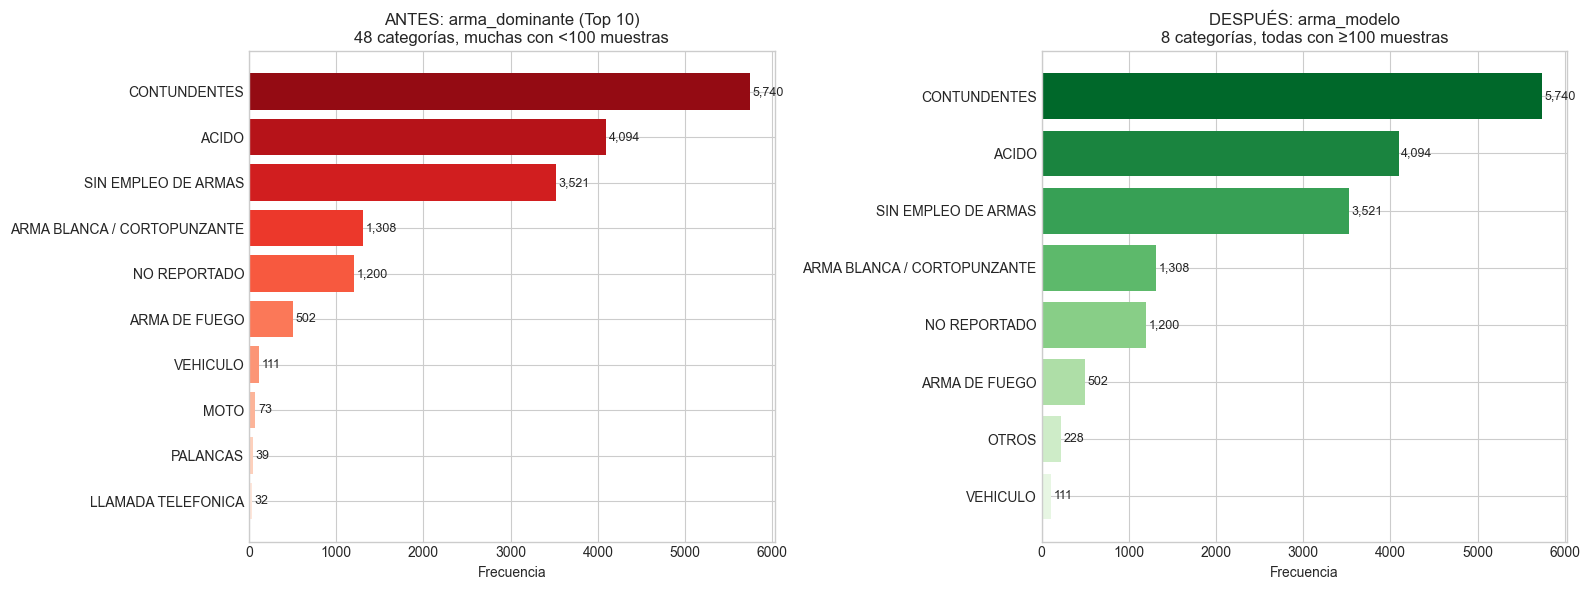

In [17]:
# 5.6 Visualización comparativa: antes vs después de agrupar armas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Antes (original)
ax1 = axes[0]
original_counts = df['arma_dominante'].value_counts().head(10)
colors1 = sns.color_palette('Reds_r', len(original_counts))
bars1 = ax1.barh(original_counts.index, original_counts.values, color=colors1)
ax1.set_xlabel('Frecuencia')
ax1.set_title('ANTES: arma_dominante (Top 10)\n48 categorías, muchas con <100 muestras')
ax1.invert_yaxis()
for bar, val in zip(bars1, original_counts.values):
    ax1.text(val + 30, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center', fontsize=9)

# Después (agrupado)
ax2 = axes[1]
modelo_counts = df['arma_modelo'].value_counts()
colors2 = sns.color_palette('Greens_r', len(modelo_counts))
bars2 = ax2.barh(modelo_counts.index, modelo_counts.values, color=colors2)
ax2.set_xlabel('Frecuencia')
ax2.set_title(f'DESPUÉS: arma_modelo\n{len(modelo_counts)} categorías, todas con ≥100 muestras')
ax2.invert_yaxis()
for bar, val in zip(bars2, modelo_counts.values):
    ax2.text(val + 30, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 6. Modelado: Clasificación de arma_modelo

Entrenaremos modelos para predecir el arma dominante usando los features preparados.

In [18]:
# 6.1 Importar librerías de modelado
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, 
    precision_score, recall_score, f1_score, roc_auc_score
)
import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías de modelado importadas")

✓ Librerías de modelado importadas


In [21]:
# 6.2 Preparar datos para entrenamiento
print("=" * 60)
print("PREPARACIÓN DE DATOS")
print("=" * 60)

# Features numéricos (excluir features derivados de lag que tenemos)
FEATURES_NUMERIC = [
    'anio', 'mes',
    'count_delito', 'count_arma',
    'count_delito_lag1', 'count_delito_lag2', 'count_delito_lag3',
    'count_arma_lag1', 'count_arma_lag2', 'count_arma_lag3',
    'count_delito_ma3', 'count_arma_ma3',
    'mes_sin', 'mes_cos'
]

# Verificar que todas las features existen
available_features = [f for f in FEATURES_NUMERIC if f in df.columns]
missing_features = [f for f in FEATURES_NUMERIC if f not in df.columns]

if missing_features:
    print(f"⚠️ Features faltantes: {missing_features}")
else:
    print(f"✓ Todas las {len(available_features)} features están disponibles")

# Codificar municipio
le_municipio = LabelEncoder()
df['codigo_municipio_encoded'] = le_municipio.fit_transform(df['codigo_municipio'])

# Codificar target (arma_modelo) - CRÍTICO para XGBoost
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df['arma_modelo'])

X = df[available_features + ['codigo_municipio_encoded']].copy()
y = y_encoded  # Usar versión codificada

print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")
print(f"\nClases en y: {len(le_target.classes_)}")
print(f"Mapeo de clases:")
for i, clase in enumerate(le_target.classes_):
    print(f"  {i}: {clase}")

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

PREPARACIÓN DE DATOS
✓ Todas las 14 features están disponibles

Shape X: (16704, 15)
Shape y: (16704,)

Clases en y: 8
Mapeo de clases:
  0: ACIDO
  1: ARMA BLANCA / CORTOPUNZANTE
  2: ARMA DE FUEGO
  3: CONTUNDENTES
  4: NO REPORTADO
  5: OTROS
  6: SIN EMPLEO DE ARMAS
  7: VEHICULO

Train: 13363 (80.0%)
Test: 3341 (20.0%)


In [22]:
# 6.3 Entrenar múltiples modelos y comparar
print("=" * 60)
print("ENTRENAMIENTO DE MODELOS")
print("=" * 60)

# Definir modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, verbosity=0, n_jobs=-1)
}

# Entrenar y evaluar
results = {}

for name, model in models.items():
    print(f"\n{name}...")
    
    # Entrenar
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Cross-validation
    cv_scores = cross_val_score(
        model, X_train, y_train, cv=5, scoring='f1_weighted'
    )
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred
    }
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1 Score (weighted): {f1:.4f}")
    print(f"  CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

ENTRENAMIENTO DE MODELOS

Logistic Regression...
  Accuracy: 0.5780
  F1 Score (weighted): 0.4692
  CV Score: 0.4613 (+/- 0.0159)

Random Forest...
  Accuracy: 0.5780
  F1 Score (weighted): 0.4692
  CV Score: 0.4613 (+/- 0.0159)

Random Forest...
  Accuracy: 0.6468
  F1 Score (weighted): 0.6144
  CV Score: 0.6129 (+/- 0.0024)

XGBoost...
  Accuracy: 0.6468
  F1 Score (weighted): 0.6144
  CV Score: 0.6129 (+/- 0.0024)

XGBoost...
  Accuracy: 0.6666
  F1 Score (weighted): 0.6406
  CV Score: 0.6384 (+/- 0.0061)
  Accuracy: 0.6666
  F1 Score (weighted): 0.6406
  CV Score: 0.6384 (+/- 0.0061)



COMPARACIÓN DE MODELOS
             Modelo  Accuracy  Precision   Recall  F1 Score  CV Score
Logistic Regression  0.577971   0.544198 0.577971  0.469218  0.461326
      Random Forest  0.646812   0.616291 0.646812  0.614420  0.612948
            XGBoost  0.666567   0.640247 0.666567  0.640552  0.638351


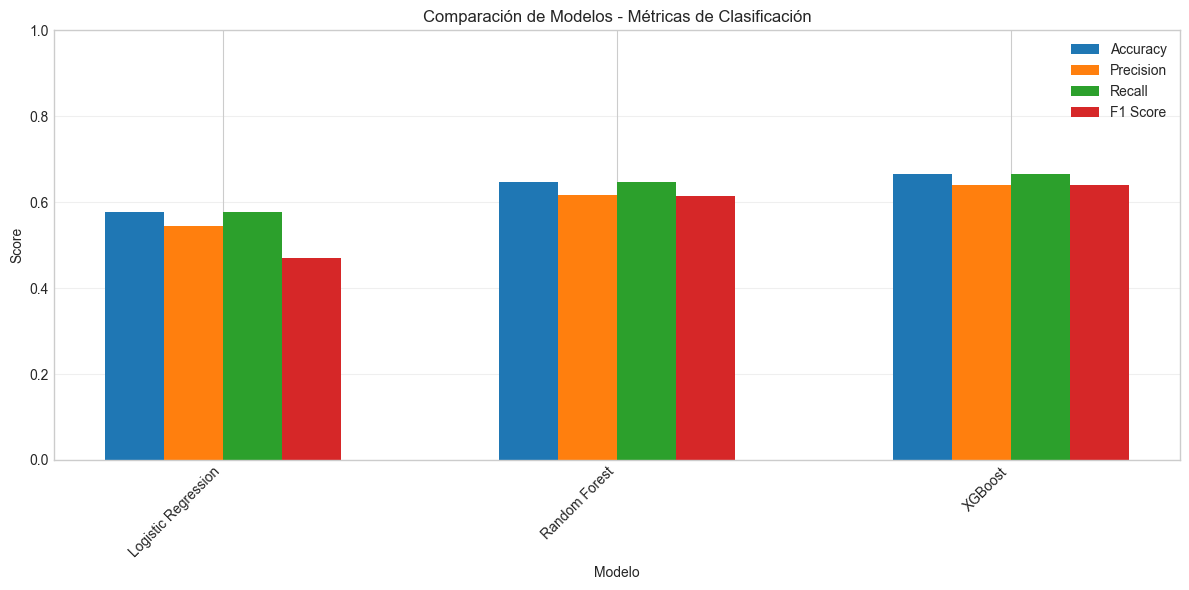

In [23]:
# 6.4 Comparación visual de modelos
results_df = pd.DataFrame({
    'Modelo': results.keys(),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1 Score': [results[m]['f1'] for m in results.keys()],
    'CV Score': [results[m]['cv_mean'] for m in results.keys()]
})

print("\n" + "=" * 60)
print("COMPARACIÓN DE MODELOS")
print("=" * 60)
print(results_df.to_string(index=False))

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(results_df))
width = 0.15

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    ax.bar(x_pos + i*width, results_df[metric], width, label=metric, color=colors[i])

ax.set_xlabel('Modelo')
ax.set_ylabel('Score')
ax.set_title('Comparación de Modelos - Métricas de Clasificación')
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(results_df['Modelo'], rotation=45, ha='right')
ax.legend()
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

ANÁLISIS DETALLADO: XGBoost

Reporte de Clasificación:
                             precision    recall  f1-score   support

                      ACIDO       0.99      0.99      0.99       819
ARMA BLANCA / CORTOPUNZANTE       0.43      0.22      0.29       262
              ARMA DE FUEGO       0.24      0.04      0.07       100
               CONTUNDENTES       0.56      0.77      0.65      1148
               NO REPORTADO       0.47      0.26      0.34       240
                      OTROS       0.00      0.00      0.00        46
        SIN EMPLEO DE ARMAS       0.62      0.58      0.60       704
                   VEHICULO       0.00      0.00      0.00        22

                   accuracy                           0.67      3341
                  macro avg       0.41      0.36      0.37      3341
               weighted avg       0.64      0.67      0.64      3341



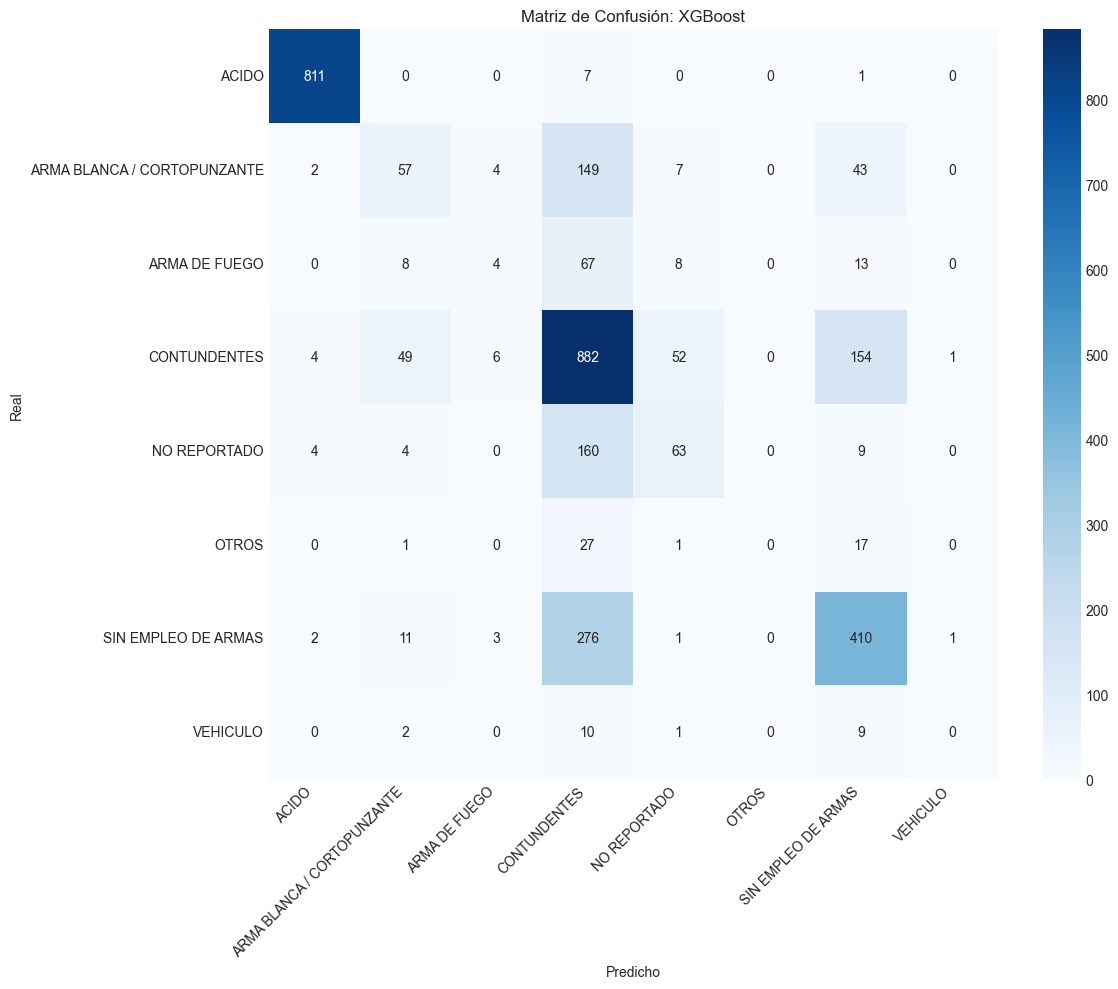

In [24]:
# 6.5 Análisis detallado del mejor modelo
best_model_name = results_df.loc[results_df['F1 Score'].idxmax(), 'Modelo']
best_model = results[best_model_name]['model']
best_pred = results[best_model_name]['y_pred']

print("=" * 60)
print(f"ANÁLISIS DETALLADO: {best_model_name}")
print("=" * 60)

# Reporte de clasificación (decodificar para mejor legibilidad)
y_test_decoded = le_target.inverse_transform(y_test)
best_pred_decoded = le_target.inverse_transform(best_pred)

print("\nReporte de Clasificación:")
print(classification_report(y_test_decoded, best_pred_decoded))

# Matriz de confusión
cm = confusion_matrix(y_test, best_pred)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
ax.set_title(f'Matriz de Confusión: {best_model_name}')
ax.set_ylabel('Real')
ax.set_xlabel('Predicho')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

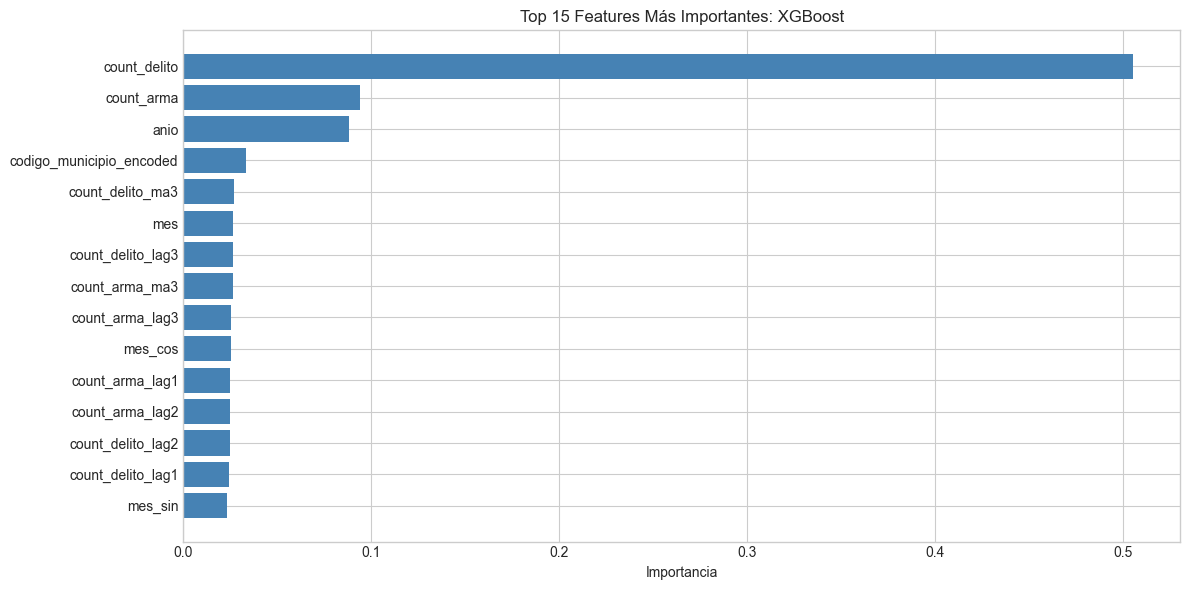


Importancia de Features:
                 Feature  Importancia
            count_delito     0.505069
              count_arma     0.093937
                    anio     0.088226
codigo_municipio_encoded     0.033191
        count_delito_ma3     0.027033
                     mes     0.026659
       count_delito_lag3     0.026420
          count_arma_ma3     0.026372
         count_arma_lag3     0.025520
                 mes_cos     0.025175


In [25]:
# 6.6 Importancia de features (si el modelo lo soporta)
if hasattr(best_model, 'feature_importances_'):
    feature_names = available_features + ['codigo_municipio_encoded']
    importances = best_model.feature_importances_
    
    # Ordenar por importancia
    indices = np.argsort(importances)[::-1]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    top_n = 15
    ax.barh(range(top_n), importances[indices][:top_n], color='steelblue')
    ax.set_yticks(range(top_n))
    ax.set_yticklabels([feature_names[i] for i in indices[:top_n]])
    ax.set_xlabel('Importancia')
    ax.set_title(f'Top {top_n} Features Más Importantes: {best_model_name}')
    ax.invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    # Tabla de importancias
    print("\nImportancia de Features:")
    feature_importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices[:10]],
        'Importancia': importances[indices][:10]
    })
    print(feature_importance_df.to_string(index=False))

## 7. Conclusiones y Recomendaciones del Modelo

In [27]:
print("=" * 60)
print("EVALUACIÓN FINAL DEL MODELO")
print("=" * 60)

best_f1 = results_df['F1 Score'].max()
best_accuracy = results_df['Accuracy'].max()

print(f"""
MODELO SELECCIONADO: {best_model_name}

MÉTRICAS DE RENDIMIENTO:
  - Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)
  - F1 Score (weighted): {best_f1:.4f}
  - Precision (weighted): {results[best_model_name]['precision']:.4f}
  - Recall (weighted): {results[best_model_name]['recall']:.4f}
  
VALIDACIÓN CRUZADA:
  - CV Score: {results[best_model_name]['cv_mean']:.4f} (+/- {results[best_model_name]['cv_std']:.4f})

EVALUACIÓN:
""")

if best_f1 > 0.75:
    eval_status = "✅ EXCELENTE - El modelo tiene buena capacidad predictiva"
elif best_f1 > 0.65:
    eval_status = "⚡ BUENO - Rendimiento aceptable, considerar ajustes"
elif best_f1 > 0.55:
    eval_status = "⚠️ MODERADO - Puede mejorarse con feature engineering"
else:
    eval_status = "❌ DÉBIL - Se requieren mejoras significativas"

print(f"  {eval_status}")

# Contar número de clases
n_classes = len(np.unique(y))

print(f"""
RECOMENDACIONES:
1. {'✓ Modelo listo para producción' if best_f1 > 0.70 else '• Continuar optimizando hiperparámetros'}
2. {'✓ Suficientes features relevantes' if results[best_model_name]['cv_mean'] > 0.60 else '• Agregar más features derivados'}
3. {'✓ Balance de clases adecuado' if n_classes <= 10 else '• Considerar agrupar más clases'}
4. • Implementar en script de producción
5. • Monitorear performance en datos nuevos

PRÓXIMOS PASOS:
  - Convertir este notebook a script Python
  - Usar {best_model_name} con estos hiperparámetros
  - Guardar modelo entrenado para predicciones
""")

EVALUACIÓN FINAL DEL MODELO

MODELO SELECCIONADO: XGBoost

MÉTRICAS DE RENDIMIENTO:
  - Accuracy: 0.6666 (66.66%)
  - F1 Score (weighted): 0.6406
  - Precision (weighted): 0.6402
  - Recall (weighted): 0.6666

VALIDACIÓN CRUZADA:
  - CV Score: 0.6384 (+/- 0.0061)

EVALUACIÓN:

  ⚠️ MODERADO - Puede mejorarse con feature engineering

RECOMENDACIONES:
1. • Continuar optimizando hiperparámetros
2. ✓ Suficientes features relevantes
3. ✓ Balance de clases adecuado
4. • Implementar en script de producción
5. • Monitorear performance en datos nuevos

PRÓXIMOS PASOS:
  - Convertir este notebook a script Python
  - Usar XGBoost con estos hiperparámetros
  - Guardar modelo entrenado para predicciones

